In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Load data
boston = datasets.load_boston()

#Show keys in the dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Pandas for data manipulation

bostonData = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonData['PRICE'] = boston.target
bostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
bostonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
bostonData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

<AxesSubplot:>

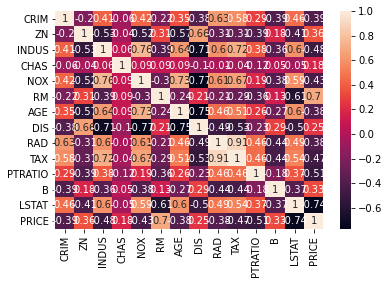

In [9]:
# Correlation with price

correlation = bostonData.corr().round(2)
sns.heatmap(correlation, annot=True)

In [10]:
# Describe datasets
bostonData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


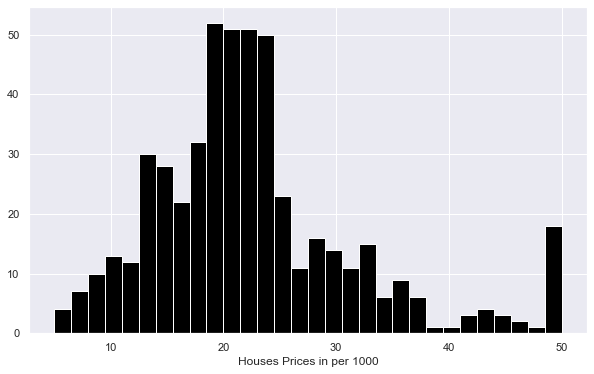

In [11]:
# Histogram for prices 
sns.set(rc={'figure.figsize':(10, 6)})
plt.hist(bostonData['PRICE'], bins=30, color='black')
plt.xlabel("Houses Prices in per 1000")
plt.show()

In [12]:
# Show correlation without price
dataWithoutPrice = pd.DataFrame(boston.data, columns=boston.feature_names)
correlationWithoutPrice = dataWithoutPrice.corr().round(2)
correlationWithoutPrice

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


<AxesSubplot:>

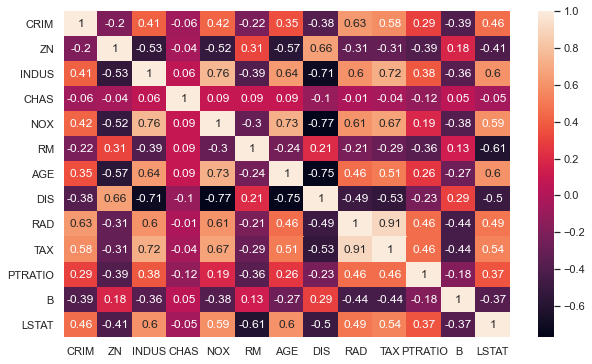

In [13]:
sns.heatmap(correlationWithoutPrice, annot=True)

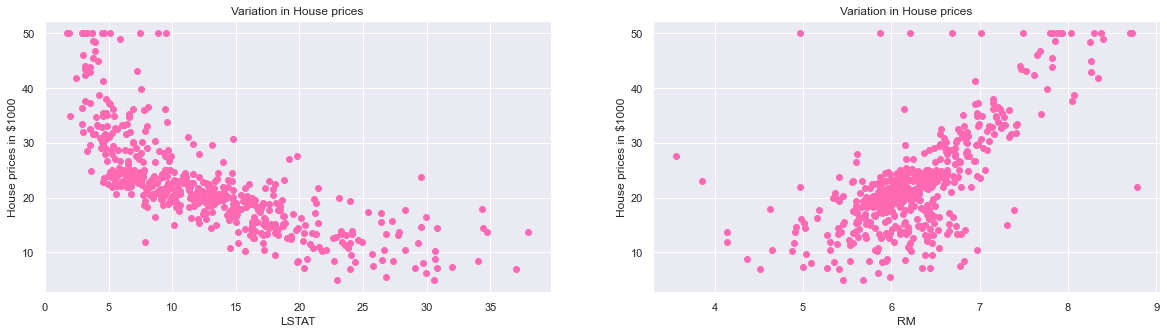

In [14]:
# Show the relation within lstat and rm with prices.Here we can se that if rm increment, the price too, and viceverse with lstat

features = ['LSTAT', 'RM']
target = bostonData['PRICE']

plt.figure(figsize=(20, 5))

for i, column in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostonData[column]
    y = target
    plt.scatter(x, y, marker='o', color = 'hotpink')
    plt.title("Variation in House prices")
    plt.xlabel(column)
    plt.ylabel('House prices in $1000')



In [15]:
# We will use only RM first

x_rooms = np.array(bostonData['RM']).reshape(-1,1)
y_prices = np.array(bostonData['PRICE']).reshape(-1, 1)

print("Rooms", x_rooms.shape)
print("Prices" ,y_prices.shape)


Rooms (506, 1)
Prices (506, 1)


In [17]:
# Split data to test and train

x_train, x_test, y_train, y_test = train_test_split(x_rooms, y_prices, test_size=0.2,  random_state=5)

print("X train ", x_train.shape)
print("Y train ", y_train.shape)

print("X test ", x_test.shape)
print("Y test ", y_test.shape)


X train  (404, 1)
Y train  (404, 1)
X test  (102, 1)
Y test  (102, 1)


In [24]:
## Linear regression simple

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)


LinearRegression()

In [20]:
y_train_predict = linear_regression.predict(x_train)
print(y_train_predict.mean())

22.646782178217812


In [22]:
mse = mean_squared_error(y_train, y_train_predict)
rmse = np.sqrt(mse)
r2 = linear_regression.score(x_train, y_train)

print("Mean squared Error: ", mse)
print("Root Mean Square Error: ", rmse)
print("Determination coefficient: ", r2.round(2))

Mean squared Error:  48.612648648611334
Root Mean Square Error:  6.972277149440585
Determination coefficient:  0.43


In [25]:
# Use test set

y_predict = linear_regression.predict(x_test)
print(y_predict.mean())

22.479529632006685


In [26]:
mseTest = mean_squared_error(y_test, y_predict)
rmseTest = np.sqrt(mse)
r2Test = linear_regression.score(x_test, y_test)

print("Mean squared Error: ", mseTest)
print("Root Mean Square Error: ", rmseTest)
print("Determination coefficient: ", r2Test.round(2))

Mean squared Error:  23.970455527991305
Root Mean Square Error:  6.972277149440585
Determination coefficient:  0.69


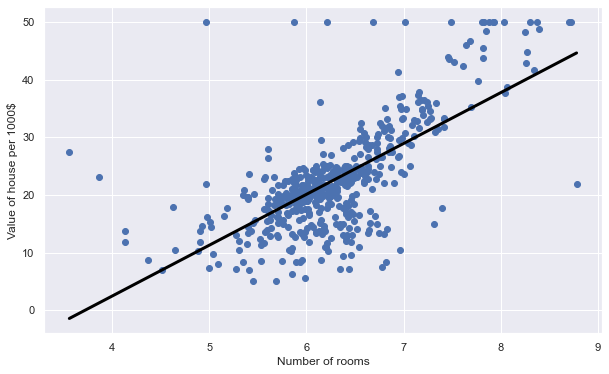

In [45]:
# Plot the line

prediction_space = np.linspace(min(x_rooms), max(x_rooms)).reshape(-1,1)
#prediction_space = x_rooms
plt.scatter(x_rooms,y_prices)
plt.plot(prediction_space, linear_regression.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('Value of house per 1000$')
plt.xlabel('Number of rooms')
plt.show()

In [46]:
# Regression model for all variables

x = bostonData.drop('PRICE', axis=1)
y = bostonData['PRICE']

In [57]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=4)

linear_model = LinearRegression()

linear_model.fit(xTrain, yTrain)

yPrediction = linear_model.predict(xTrain)

mseAllTrain = mean_squared_error(yTrain, yPrediction)
rmseAllTrain = np.sqrt(mseAllTrain)
r2_scoreTrain = linear_model.score(xTrain, yTrain)

print("The model performance for training set")
print("-"*40)
print("Mean squared Error: ", mseAllTrain)
print("Root Mean Square Error: ", rmseAllTrain)
print("Determination coefficient: ", r2_scoreTrain.round(2))


The model performance for training set
----------------------------------------
Mean squared Error:  21.197139922226427
Root Mean Square Error:  4.604035178213393
Determination coefficient:  0.74


In [58]:
y_pred = linear_model.predict(xTest)

msefinal = mean_squared_error(yTest, y_pred)
rmsefinal = np.sqrt(msefinal)
r2_final = linear_model.score(xTest, yTest)

print("The model performance for test set")
print("-"*40)
print("Mean squared Error: ", msefinal)
print("Root Mean Square Error: ", rmsefinal)
print("Determination coefficient: ", r2_final.round(2))


The model performance for test set
----------------------------------------
Mean squared Error:  25.4195871268218
Root Mean Square Error:  5.041784121402046
Determination coefficient:  0.73


Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

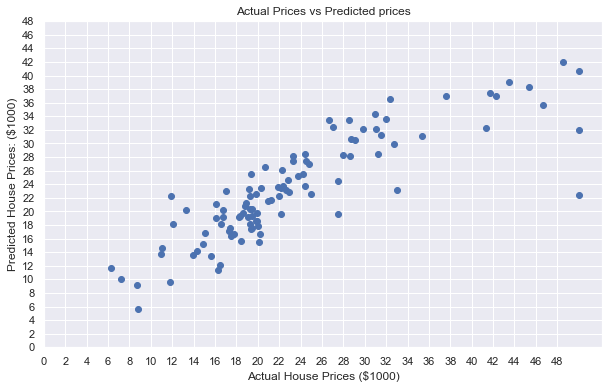

In [61]:
# Show 

plt.scatter(yTest, y_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Actual Prices vs Predicted prices")